In [54]:
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
df = pd.read_csv ('../data/productionComp.csv')
df.drop (columns= ['Unnamed: 0'], inplace=True)

In [56]:
# df.info ()

In [57]:
pcg = df [['production_companies', 'genres']]


In [58]:
import ast

In [59]:
pcg['production_companies'] = pcg.production_companies.apply (lambda x : ast.literal_eval (x))
pcg['genres'] = pcg.genres.apply (lambda x : ast.literal_eval (x))

In [60]:
pcg['num_comp'] = pcg.production_companies.apply (lambda x : len(x))
pcg['num_genres'] = pcg.genres.apply (lambda x : len(x))


In [61]:
filt = ((pcg.num_comp == 0) | (pcg.num_genres == 0))

In [62]:
pcg.drop(pcg.loc[filt].index, inplace=True)

In [63]:
pcg.reset_index(drop=True, inplace=True)

In [64]:
pcg

,production_companies,genres,num_comp,num_genres
0,[Pixar Animation Studios],"[Animation, Comedy, Family]",1,3
1,"[TriStar Pictures, Teitler Film, Interscope Co...","[Adventure, Fantasy, Family]",3,3
2,"[Warner Bros., Lancaster Gate]","[Romance, Comedy]",2,2
3,[Twentieth Century Fox Film Corporation],"[Comedy, Drama, Romance]",1,3
4,"[Sandollar Productions, Touchstone Pictures]",[Comedy],2,1
...,...,...,...,...
33231,"[Neptune Salad Entertainment, Pirie Productions]",[Horror],2,1
33232,[Concorde-New Horizons],[Science Fiction],1,1
33233,"[Westdeutscher Rundfunk (WDR), Working Title F...","[Drama, Action, Romance]",4,3
33234,[Sine Olivia],[Drama],1,1


In [65]:
# pcg.production_companies[1][1].upper()
# pcg.production_companies[1][1].upper()

In [66]:
def get_Comp (comp_list):
    if 'Paramount Pictures' in comp_list:
    # if 'Warner Bros.' in comp_list:
        return comp_list

In [67]:
pcg['production_companies'] = pcg.production_companies.apply (get_Comp)

In [68]:
# pcg_warnerBros = pcg.dropna(axis='index', how='any', subset=['production_companies'])
pcg_Paramount = pcg.dropna(axis='index', how='any', subset=['production_companies'])

In [69]:
pcg_Paramount.drop (columns=['num_genres', 'num_comp'], inplace=True)
# pcg_warnerBros.drop (columns=['num_genres', 'num_comp'], inplace=True)

In [70]:
pcg_Paramount

,production_companies,genres
2,"[Warner Bros., Lancaster Gate]","[Romance, Comedy]"
5,"[Regency Enterprises, Forward Pass, Warner Bros.]","[Action, Crime, Drama, Thriller]"
18,"[O Entertainment, Warner Bros., Morgan Creek P...","[Crime, Comedy, Adventure]"
22,"[Silver Pictures, Canal+, Warner Bros., Dino D...","[Action, Adventure, Crime, Thriller]"
37,"[Dualstar Productions, Warner Bros., Rysher En...","[Comedy, Family, Romance]"
...,...,...
32735,"[Canal+, Studio Canal, Warner Bros., Syncopy, ...","[Action, Drama, History, Thriller, War]"
32742,[Warner Bros.],"[Animation, Family, Comedy]"
32743,[Warner Bros.],[Animation]
32744,[Warner Bros.],"[Animation, Family, Comedy]"


In [71]:
from collections import Counter

In [72]:
genres_count = Counter ()
for item in list (pcg_Paramount.genres):
    genres_count.update(item)

In [73]:
genres_list = []
num = []
for elem in genres_count.most_common (5):
    genres_list.append (elem[0])
    num.append (elem[1])
# genres_list, num

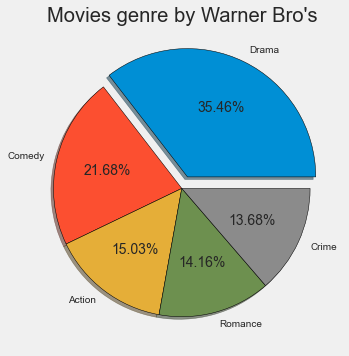

In [74]:
plt.style.use('fivethirtyeight')
plt.title ('Movies genre by Paramount pictures')
# plt.rc (font)
explode = (0.1, 0, 0, 0, 0)
plt.pie (num, labels = genres_list, explode = explode, shadow=True, autopct='%1.2f%%', wedgeprops={'edgecolor':'black'})
plt.savefig ('../Visualplots/Paramount.jpeg')